<a href="https://colab.research.google.com/github/acflach/Reducao-Dimensionalidade/blob/main/Redu%C3%A7%C3%A3o_de_Dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de bibliotecas

In [34]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

#Função para carregamento de arquivo de imagem

In [35]:
def load_image(image_file):

  # Testa se nome de arquivo não é vazio
  if not image_file:
    print("Nenhum arquivo de imagem fornecido!")
    return None

  # Testa se arquivo de imagem existe no sistema de arquivos
  if not os.path.exists(image_file):
    print(f"Arquivo '{image_file}' não encontrado!")
    return None

  # Abre arquivo de imagem
  try:
    image = Image.open(image_file)
    return image
  except Exception as e:
    print(f"Erro ao abrir a imagem do arquivo '{image_file}': {e}")
    return None

# Função que converte np.array rgb para grayscale com o produto matricial dot

In [36]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

#Função para conversão da imagem em escala de cinza


In [37]:
def convert_to_grayscale(image):
  if image is None:
    return None

  # Converte Image para array NumPy
  image_np = np.array(image)

  # Conversão para níveis de cinza (grayscale)
  image_grayscale_np = rgb2gray(image_np)
  return image_grayscale_np

#Função para conversão da imagem em binária

In [38]:
def convert_to_binary(image, threshold):
   # Converte para grayscale
  image_grayscale_np = convert_to_grayscale(image)

   # Prrenche o array com 0 ou 1 conforme o valor do threshold
  image_binary_np = (image_grayscale_np > threshold).astype(np.uint8)

  return image_binary_np

#Função para exibição das imagens

In [39]:
def show_images(image, image_grayscale, image_binary):
  cm = 1/2.54
  plt.figure(figsize=(30*cm, 15*cm))
  plt.subplot(1, 3, 1)
  plt.imshow(image)
  plt.title("Original")
  plt.axis('off')
  plt.subplot(1, 3, 2)
  plt.imshow(image_grayscale, cmap='gray')
  plt.title("Grayscale")
  plt.axis('off')
  plt.subplot(1, 3, 3)
  plt.imshow(image_binary, cmap='gray')
  plt.title("Binária")
  plt.axis('off')
  plt.tight_layout()
  plt.show()

#Testes


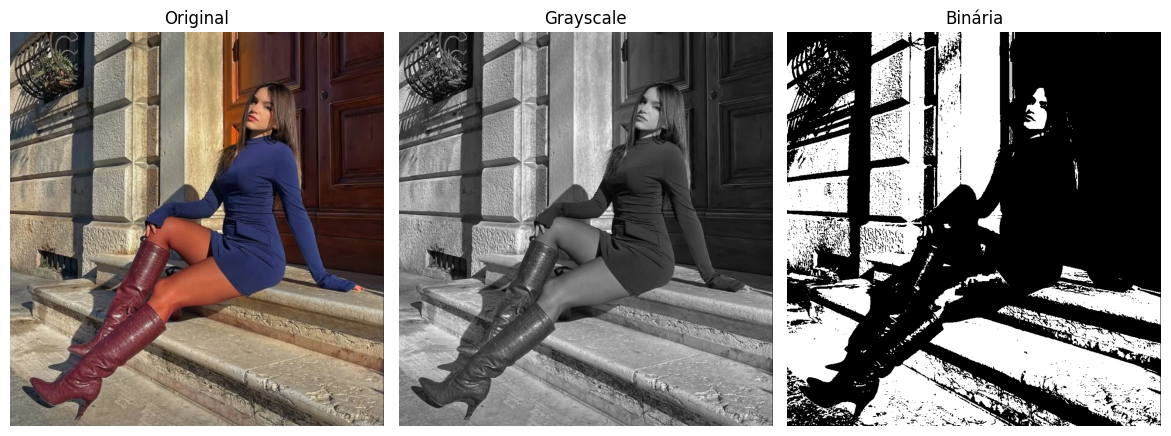

In [40]:
image = load_image("imagem1.png")

image_grayscale = convert_to_grayscale(image)
image_binary = convert_to_binary(image=image, threshold=128)

show_images(image, image_grayscale, image_binary)

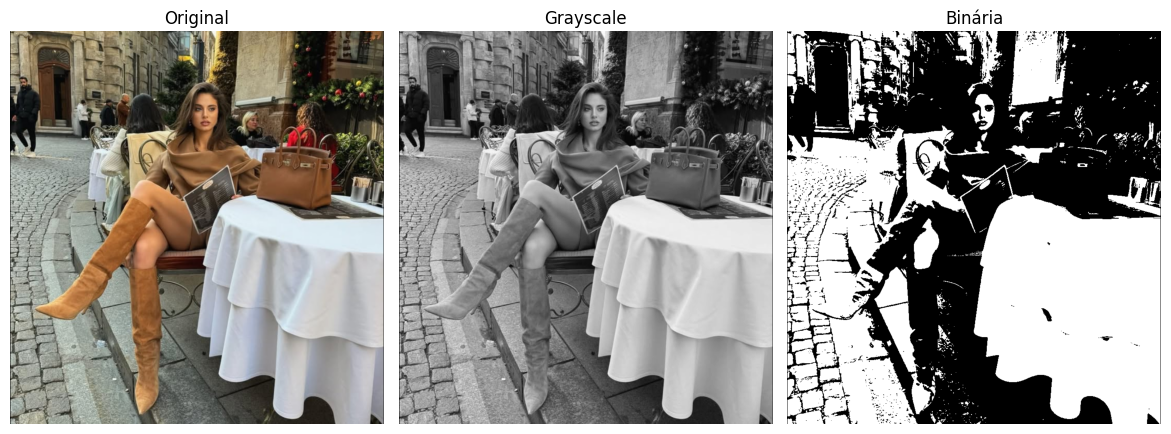

In [41]:
image = load_image("imagem2.png")

image_grayscale = convert_to_grayscale(image)
image_binary = convert_to_binary(image=image, threshold=128)

show_images(image, image_grayscale, image_binary)